# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
np.random.seed(42)

# Loading + Splitting The Dataset

In [3]:
digits = load_digits()

print("Dataset Information:")
print(f"Number of samples: {digits.data.shape[0]}")
print(f"Number of features: {digits.data.shape[1]}")
print(f"Number of classes: {len(np.unique(digits.target))}")
print(f"Classes: {np.unique(digits.target)}")

Dataset Information:
Number of samples: 1797
Number of features: 64
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


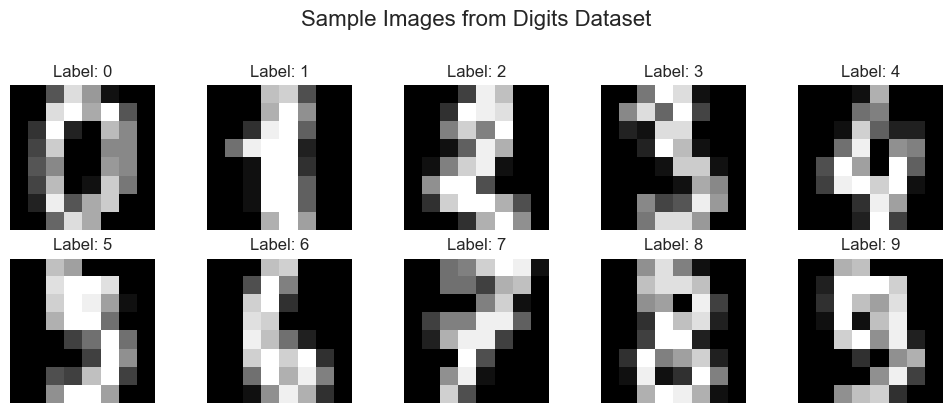

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.suptitle('Sample Images from Digits Dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, 
    test_size=0.2, 
    random_state=42,
    stratify=digits.target 
)

print("Data Split Information:")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(digits.data)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(digits.data)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

Data Split Information:
Training set size: 1437 samples (80.0%)
Testing set size: 360 samples (20.0%)
Number of features: 64


In [6]:
train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)

print("Class distribution in training set:")
for i in range(10):
    print(f"  Class {i}: {train_class_counts[i]} samples ({train_class_counts[i]/len(y_train)*100:.1f}%)")

print("\nClass distribution in testing set:")
for i in range(10):
    print(f"  Class {i}: {test_class_counts[i]} samples ({test_class_counts[i]/len(y_test)*100:.1f}%)")

Class distribution in training set:
  Class 0: 142 samples (9.9%)
  Class 1: 146 samples (10.2%)
  Class 2: 142 samples (9.9%)
  Class 3: 146 samples (10.2%)
  Class 4: 145 samples (10.1%)
  Class 5: 145 samples (10.1%)
  Class 6: 145 samples (10.1%)
  Class 7: 143 samples (10.0%)
  Class 8: 139 samples (9.7%)
  Class 9: 144 samples (10.0%)

Class distribution in testing set:
  Class 0: 36 samples (10.0%)
  Class 1: 36 samples (10.0%)
  Class 2: 35 samples (9.7%)
  Class 3: 37 samples (10.3%)
  Class 4: 36 samples (10.0%)
  Class 5: 37 samples (10.3%)
  Class 6: 36 samples (10.0%)
  Class 7: 36 samples (10.0%)
  Class 8: 35 samples (9.7%)
  Class 9: 36 samples (10.0%)


# Implementing CART Model + Evaluation

In [7]:
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)

y_pred_baseline = baseline_dt.predict(X_test)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted')
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted')
f1_baseline = f1_score(y_test, y_pred_baseline, average='weighted')

print("Baseline Decision Tree Results:")
print(f"  Accuracy:  {accuracy_baseline:.4f}")
print(f"  Precision: {precision_baseline:.4f}")
print(f"  Recall:    {recall_baseline:.4f}")
print(f"  F1-score:  {f1_baseline:.4f}")

Baseline Decision Tree Results:
  Accuracy:  0.8250
  Precision: 0.8241
  Recall:    0.8250
  F1-score:  0.8237


In [8]:
print("Detailed Classification Report for Baseline Model:")
print(classification_report(y_test, y_pred_baseline, target_names=[str(i) for i in range(10)]))

Detailed Classification Report for Baseline Model:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.78      0.80      0.79        35
           3       0.79      0.81      0.80        37
           4       0.86      0.86      0.86        36
           5       0.88      0.95      0.91        37
           6       0.81      0.83      0.82        36
           7       0.84      0.86      0.85        36
           8       0.71      0.69      0.70        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



# Implementing Decision Tree with Bagging + Evaluation

In [9]:
base_tree = DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,  
    random_state=42,
    n_jobs=-1  
)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Classifier Results:")
print(f"  Accuracy:  {accuracy_bagging:.4f}")
print(f"  Precision: {precision_bagging:.4f}")
print(f"  Recall:    {recall_bagging:.4f}")
print(f"  F1-score:  {f1_bagging:.4f}")

Bagging Classifier Results:
  Accuracy:  0.9194
  Precision: 0.9195
  Recall:    0.9194
  F1-score:  0.9185
